# Introduction
There are different cereal products in the market and each cereal manufacter use different formular to constitute their products. For many reasons, customers rate cereal products differently and it beacons the question, "Could any of the constituent cause customers to rate the product more or less?"

In this project we'll be attempting to answer this question with the given data.


# Fields in dataset
`Name`: Name of cereal
`mfr`: Manufacturer of cereal
   - A = American Home Food Products;
   - G = General Mills
   - K = Kelloggs
   - N = Nabisco
   - P = Post
   - Q = Quaker Oats
   - R = Ralston Purina
   - type:
       - cold
       - hot
       
`calories`: calories per serving

`protein`: grams of protein

`fat`: grams of fat

`sodium`: milligrams of sodium

`fiber`: grams of dietary fiber

`carbo`: grams of complex carbohydrates

`sugars`: grams of sugars

# Acknowledgement
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found [here.](https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)


# Python to analyse
Python is the choice of language for this analysis so let's go ahead and import the important libraries to get the analysis done

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.style as style
import seaborn as sns
import requests
import os
plt.style.use('default')

In [ ]:
url='https://www.kaggle.com/datasets/crawford/80-cereals/download'
requests.get(url)

In [2]:
raw=pd.read_csv("Dhata/cereal.csv")
raw.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
raw.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


## Observation
Minimum dietry nutrient cannot be equal to -1. minimum dietry nutrient could be 0, meaning absense of the nutrient. The sample size of the data is just 76. In that case we are making an assumption that cereal products having less than 0 contennt does not have the content. For example, cereal having carbo of -1 has not it. 
- carbo less than 0 is to be replaced by 0
- sugars less than 0 is to be replaced by 0
- patass less than 0 is to be replaced by 0



# Data cleaning
- Replace nutritional content that is less than 0 with 0

- Also, the mfr will be replaced with the appropiate name of manufacturer

In [5]:

df=raw.replace({
    "carbo":{-1.0:0},
    "sugars":{-1.0:0},
    "potass":{-1.0:0},
    "mfr":{ "A":"American Home Food Products",
            "G":"General Mills",
            "K":"Kelloggs",
            "N":" Nabisco",
            "P":"Post",
            "Q":"Quaker Oats",
            "R":"Ralston Purina"
        
    }
})
# view to confirm changes made to dataset
df.sort_values("carbo").head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.0,0.67,50.828392
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


# Analysis

In [6]:
mf=df['mfr'].value_counts()
mf=mf.reset_index().rename({"index":"Manufacturer","mfr":"no_of_products"},axis=1).sort_values("no_of_products")
mf.sort_values("no_of_products",ascending=False)

,Manufacturer,no_of_products
0,Kelloggs,23
1,General Mills,22
2,Post,9
3,Quaker Oats,8
4,Ralston Purina,8
5,Nabisco,6
6,American Home Food Products,1


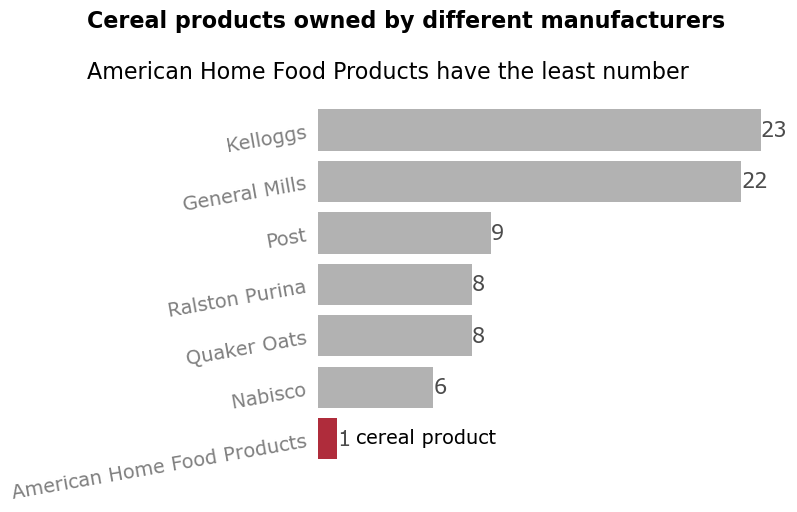

In [7]:

fig,ax=plt.subplots(figsize=(6,5))
ls=mf.query('no_of_products==1')
p=ax.barh(mf['Manufacturer'],mf["no_of_products"],color='grey',alpha=.6)
ax.barh(ls['Manufacturer'],ls["no_of_products"],color='#af0b1e',alpha=0.8)

ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks(mf['Manufacturer'].to_list())
ax.set_yticklabels(mf['Manufacturer'],name="Verdana",color='grey',rotation=10,size=14)
ax.tick_params(left=False)
plt.text(2,-0.09,"cereal product",color="k",size=14,name="Verdana")

###########
plt.text(-12,8,'Cereal products owned by different manufacturers',size=16,weight='bold')
plt.text(-12,7,'American Home Food Products have the least number',size=16,)

ax.set_xticks([])
plt.bar_label(p,label_type='edge',size=15,name="Verdana",alpha=0.7)
plt.show()

In [8]:
c_d=df[['type']].value_counts()
c_d.index=["Cold","Hot"]
c_d

Cold    74
Hot      3
dtype: int64

# Maypo is the second highest rated Hot cereal

In [9]:
df.query('type=="H"')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,0,0,2,1.0,1.00,64.533816
43,Maypo,American Home Food Products,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Quaker Oats,H,100,5,2,0,2.7,0.0,0,110,0,1,1.0,0.67,50.828392


# Top rated cereal products of  diff manufacturers


In [10]:
a = df.groupby(['mfr', 'name'], as_index=False)['rating'].max().sort_values(['mfr', 'rating'], ascending=False)
b = a.groupby('mfr')[['mfr', 'name', 'rating']].head(1).sort_values('rating', ascending=False) 
b

,mfr,name,rating
30,Kelloggs,All-Bran with Extra Fiber,93.704912
3,Nabisco,Shredded Wheat 'n'Bran,74.472949
66,Quaker Oats,Puffed Wheat,63.005645
6,American Home Food Products,Maypo,54.850917
57,Post,Grape-Nuts,53.371007
27,General Mills,Wheaties,51.592193
76,Ralston Purina,Wheat Chex,49.787445


In [11]:
# determine the correlation between rating and other variables
rf=df.corr()["rating"].sort_values()[:-1] 
pos_corr=rf[rf.values>=0] #filter out negatively correalted variables
neg_corr=rf[rf.values<0]# filter out positively correlated variables


###########################------positively correlated variables----############################
#determine the mean rating of each protein measurement
rp=df[['protein','rating']].groupby('protein',as_index=False)['rating'].mean()
#determine the mean rating of each fiber measurement
df2=df[['fiber','rating']].groupby('fiber',as_index=False)['rating'].mean()

###########################------Negatively correlated variables----############################
#determine the mean rating of each sugar measurement
sr=df[['sugars','rating']].groupby('sugars',as_index=False)['rating'].mean()

#determine the mean rating of each calory measurement
rc=df[['calories','rating']].groupby('calories',as_index=False)['rating'].mean()

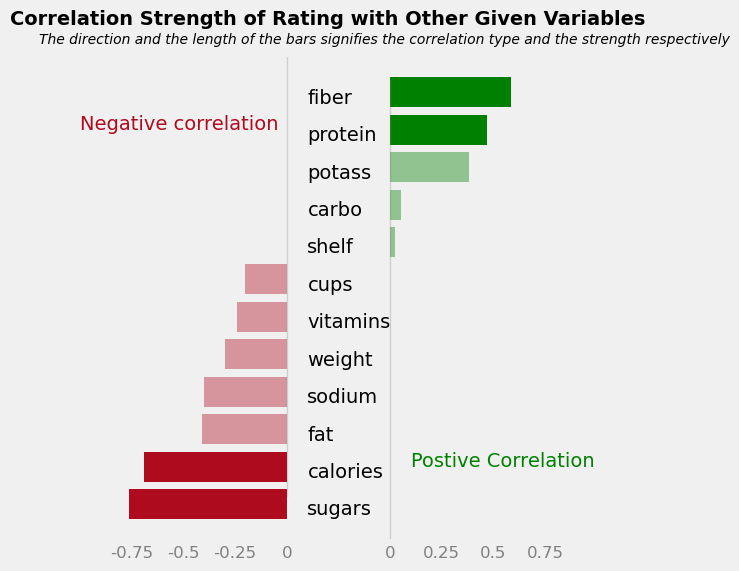

In [12]:
style.use('fivethirtyeight') #set the style for the stage
def lab(x,y):
    '''This fxn adds label unto a barchart
    '''
    for i in range(len(x)):
        plt.text(y[i]+0.5,x[i],round(y[i],2),color='grey',alpha=0.6)
        
###################### Bar chart############################
fig,ax=plt.subplots(figsize=(5,6))
green=rf[rf>=0]
red=rf[rf<0]
x2=plt.barh(red.index,red.values,color='#af0b1e')
x1=plt.barh(green.index,green.values,color='green',left=0.5)

for x in range(0,3):
    x1[x].set_alpha(0.4)

for i in [6,5,4,3,2]:
    x2[i].set_alpha(0.4)

#####################################
#plt.bar_label(x2,fmt='%.2f',alpha=0.6,color='grey') 
#lab(green.index,green.values)
ax.set_yticks([])
ax.set_xticks(np.arange(-0.75, 1.5, .25))
ax.set_xticklabels(('-0.75', '-0.5', '-0.25', '0', '', '0', '0.25', '0.5', '0.75'), color='grey', fontsize=12)
ax.set_title('Correlation Strength of Rating with Other Given Variables\n', size=14,weight='bold')
ax.text(-1.2,12.3,'The direction and the length of the bars signifies the correlation type and the strength respectively',
        size=10, fontstyle='italic')
ax.text(0.6,1,"Postive Correlation",color="green")
ax.text(-1,10,'Negative correlation',color='#af0b1e')
plt.axvline(0, color='grey', alpha=0.3, linewidth=1, ymin=0.09)
plt.axvline(0.5, color='grey', alpha=0.3, linewidth=1,ymax=0.95, ymin=-0.62)
plt.grid(False)
##################
for name, loc in zip(rf.index,range(0,len(rf.index))):
    plt.text(0.10,loc-0.3,name)

# Significant correlation between rating & other given variables?

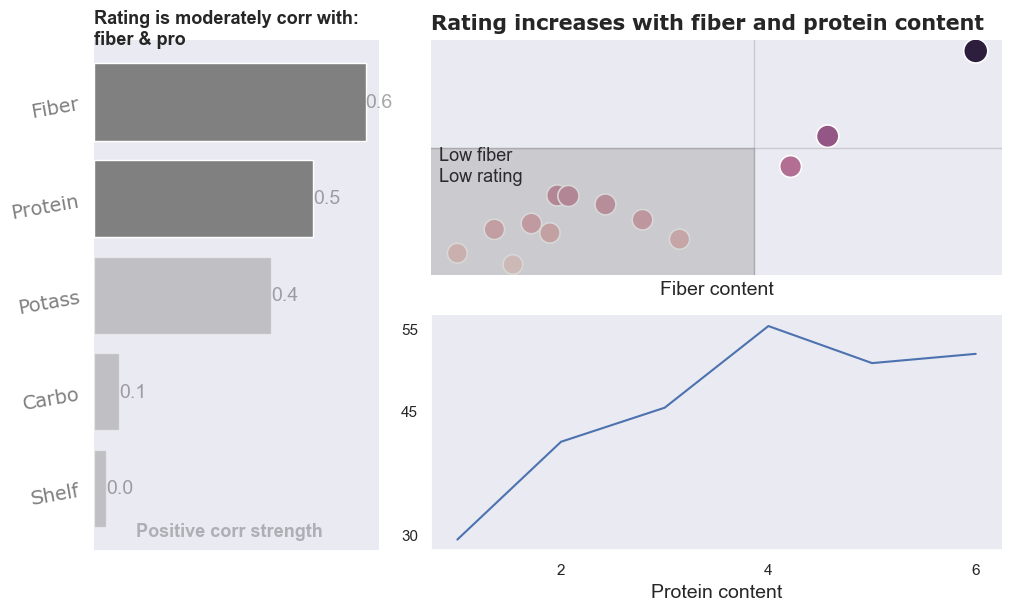

In [13]:
sns.set(style='dark')
#create figure and add 3 axes to it
fig =plt.figure(constrained_layout=True,figsize=(10,6))

gspec=fig.add_gridspec(nrows=2,ncols=3) #initialize 2 row & 3 coulumns for the subplots

#add the axes to the figure
ax1=fig.add_subplot(gspec[:,0])
ax2=fig.add_subplot(gspec[0,1:])
ax3=fig.add_subplot(gspec[1,1:])
####################---------axes ax1 is a barchart----------#####################################
x1=ax1.barh(pos_corr.index,pos_corr.values, color='grey')
ax1.bar_label(x1,fmt='%.1f', size=14,alpha=0.4)
ax1.spines["right"].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set(xticks=([]),yticks=())
ax1.set_yticks(pos_corr.index)
ax1.set_yticklabels(['Shelf','Carbo','Potass','Protein','Fiber'],name="Verdana",color='grey',rotation=10,size=14)
ax1.tick_params(left=False)
for i in range(0,3):
    x1[i].set_alpha(0.4)
ax1.text(0.09,-0.5,'Positive corr strength',size=13,weight='bold', alpha=0.3)
ax1.text(0,4.6,'Rating is moderately corr with:\nfiber & pro',size=13,weight='bold')

####################---------axes ax2 is a scatterplot----------#####################################
sns.scatterplot(data=df2,x='fiber',y='rating',hue='rating',size='rating',sizes=(200,300), legend=False, ax=ax2)
ax2.spines["right"].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set(yticks=([]),xticks=([]))
ax2.set(ylabel=None)
ax2.set_xlabel('Fiber content', size=14)
ax2.axvline(8, color='grey', alpha=0.3, linewidth=1,ymax=70)
ax2.axhline(65, color='grey', alpha=0.3, linewidth=1,xmax=16,xmin=-2)
rect=mpatches.Rectangle((-1,14),9,51, 
                        fill = True,
                        color = "grey",
                        alpha=0.3,
                        linewidth = 1)
ax2.add_patch(rect)
ax2.text(-0.5,55,"Low fiber\nLow rating", size=13,color='k',alpha=0.9)
ax2.text(-0.7, 100,"Rating increases with fiber and protein content", size=15,name="Verdana",weight='bold')
####################---------axes ax3 is a line graph----------#####################################
ax3.plot(rp['protein'],rp['rating'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_yticks([30,45, 55])
ax3.set_xticks([2,4, 6])
ax3.set_xlabel('Protein content', size=14)

plt.show()

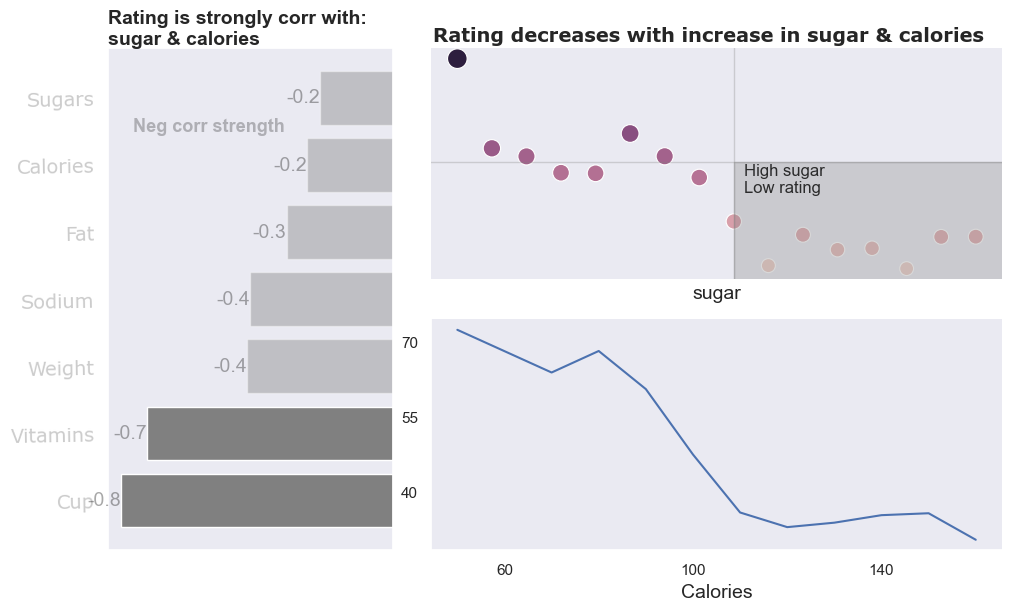

In [14]:
sns.set(style='dark')
fig =plt.figure(constrained_layout=True,figsize=(10,6))
gspec=fig.add_gridspec(nrows=2,ncols=3)
ax1=fig.add_subplot(gspec[:,0])
ax2=fig.add_subplot(gspec[0,1:])
ax3=fig.add_subplot(gspec[1,1:])
####################---------axes ax1 is a bar----------#####################################
x1=ax1.barh(neg_corr.index,neg_corr.values, color='grey')
ax1.bar_label(x1,fmt='%.1f', size=14,alpha=0.4)
ax1.set_yticks(neg_corr.index)
ax1.set(xticks=([]))
ax1.set_yticklabels(['Cup','Vitamins','Weight','Sodium','Fat','Calories','Sugars'],name="Verdana",color='grey',rotation=1,size=14,alpha=0.4)
for i in [6,5,4,3,2]:
      x1[i].set_alpha(0.4)
ax1.text(-0.73,5.5,'Neg corr strength',size=13,weight='bold', alpha=0.3)
ax1.text(-0.8,6.8,'Rating is strongly corr with:\nsugar & calories',size=14,weight='bold')
####################---------axes ax2 is a scatterplot----------#####################################
sns.scatterplot(data=sr,x='sugars',y='rating',hue='rating',size='rating', legend=False,sizes=(100,200),ax=ax2)
ax2.spines["right"].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set(yticks=([]),xticks=([]))
ax2.set(ylabel=None)
ax2.set_xlabel('sugar', size=14)
ax2.axvline(8, color='grey', alpha=0.3, linewidth=1,ymax=70)
ax2.axhline(48, color='grey', alpha=0.3, linewidth=1,xmax=16,xmin=-2)
rect=mpatches.Rectangle((8,14),9,34, 
                        fill = True,
                        color = "grey",
                        alpha=0.3,
                        linewidth = 1)
ax2.add_patch(rect)
ax2.text(8.3,42,"High sugar\nLow rating", size=12,color='k',alpha=0.9)
ax2.text(-0.7, 72,"Rating decreases with increase in sugar & calories", size=14,name="Verdana",weight='bold')
####################---------axes ax3 is a line graph----------#####################################
ax3.plot(rc['calories'],rc['rating'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_yticks([40,55, 70])
ax3.set_xticks([60,100,140,])
ax3.set_xlabel('Calories', size=14)

plt.show()

# Observation & conclusion
Rating may not be associated with the nutritional benefits of cereal products. However, the concentration of certain nutrients presents in cereals were found to have direct relationship with customers' rating. For intsance, a very high concentration of calories and sugar in cereal will negatively impact customer rating irrespective of the overall nutritional benefit.
